# Simulated Data

Fix time
pylint style
pylint ___.py 
y ~  1 + C1 + R1
at time 1: b1,b2,b3 (b1 has time --> time as x)
look at different treatments & sums coding
center and normalize continuous varaibles
crossing scale 

In [1]:
# imports
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.formula.api import OLS
import statsmodels.api as sm

from eegr import sim_data as sd
from eegr import fit_bucket as fb
import matplotlib.pyplot as plt
import statsmodels.graphics.regressionplots as sgr
import seaborn as sns

/usr/local/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Examining dataframe

#### Creating sample dataframe

In [2]:
epoch_p = (1,6)
time_p = (0,9,1)
cat_p = [(0,9),(5,2)]
cont_p = [(0,1)]

In [3]:
sample_df = sd.df_gen(epoch_p=epoch_p, time_p=time_p, cat_p=cat_p, cont_p=cont_p)

In [4]:
times = sample_df.index.levels[sample_df.index.names.index('Time')].tolist()
times_temp = np.concatenate([np.tile(x,len(set(sample_df.cat))) for x in times])
times = np.tile(times_temp,len(sample_df.index.levels[sample_df.index.names.index('Epoch_idx')]))
sample_df['times'] = times

#### making fit_grids

In [5]:
LHS = ["data"]
RHS = "cat -1"
fit_grids = fb.make_fit_table(sample_df,LHS,RHS)

subid: testing1


Examining the coefficients

In [6]:
line1 = [i[0] for x in range(fit_grids[0].shape[0]) for i in (fit_grids[0][x][0]['fit']['coef'])]
line2 = [i[1] for x in range(fit_grids[0].shape[0]) for i in (fit_grids[0][x][0]['fit']['coef'])]

In [7]:
slope1, intercept1 = np.polyfit(np.unique(times), line1, 1)
slope2, intercept2 = np.polyfit(np.unique(times), line2, 1)

### Plotting

Completing times x data

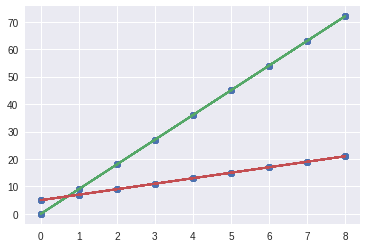

In [8]:
line1 = sample_df['times']*slope1 + intercept1
line2 = sample_df['times']*slope2 + intercept2
_ = plt.plot(sample_df['times'],sample_df['data'],'o',
         sample_df['times'], line1,
         sample_df['times'], line2)

In [1]:
cooks_d = [num for num in fit_grids[0][i][0]['diag']['cooks_d'] for i in range(fit_grids[0].shape[0])]
sns.heatmap(sample_df, fmt='g')

NameError: name 'fit_grids' is not defined

### Add in random continuous predictor with mean 0 and 1

In [ ]:
sample_df

In [ ]:
LHS = ["data"]
RHS = "cat + cont -1"
fit_grids = fb.make_fit_table(sample_df,LHS,RHS)